# Проект "Развлекательное мобильное приложение".

<b>Цель:</b> выявление причин неэффективности рекламной кампании развлекательного приложения.

Несмотря на огромные вложения в рекламу развлекательного последние несколько месяцев компания терпит убытки. Необходимо разобраться в причинах и помочь компании выйти в плюс.


<b>Задачи:</b>
* Выяснить, с каких рекламных каналов и с каких устройств приходят пользователи.
* Определить стоимость привлечения пользователей из различных рекламных каналов.
* Рассчитать прибыль с каждого клиента.
* Рассчитать время окупаемости расходов на привлечение клиента.
* Определить факторы, которые мешают привлечению клиентов.
* Выяснить причины неэффективности привлечения пользователей.
* Сформулировать рекомендации для отдела маркетинга.


<b>Описание данных</b>

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
* лог сервера с данными об их посещениях,
* выгрузка их покупок за этот период,
* рекламные расходы.


* Файл visits_info_short.csv - лог сервера с информацией о посещениях сайта;
* orders_info_short.csv — информация о покупках;
* costs_info_short.csv — информация о расходах на рекламу.

Структура `visits_info_short.csv`
* User Id — уникальный идентификатор пользователя,
* Region — страна пользователя,
* Device — тип устройства пользователя,
* Channel — идентификатор источника перехода,
* Session Start — дата и время начала сессии,
* Session End — дата и время окончания сессии.

Структура `orders_info_short.csv`
* User Id — уникальный идентификатор пользователя,
* Event Dt — дата и время покупки,
* Revenue — сумма заказа.

Структура `costs_info_short.csv`
* Channel — идентификатор рекламного источника,
* Dt — дата проведения рекламной кампании,
* Costs — расходы на эту кампанию.

### 1. Обзор данных

Импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta

Загрузим даннае из файлов.

In [2]:
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')
except:
    visits = pd.read_csv('visits_info_short.csv')
    orders = pd.read_csv('orders_info_short.csv')
    costs = pd.read_csv('costs_info_short.csv')

In [3]:
visits.head(5)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
orders.sample(5)

,User Id,Event Dt,Revenue
12742,890638838755,2019-08-16 13:21:08,4.99
18040,916472122757,2019-09-15 14:26:14,4.99
14734,496702062878,2019-08-28 17:18:17,4.99
35056,134406825348,2019-09-07 16:23:24,4.99
10487,802465511523,2019-08-02 13:59:41,4.99


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [7]:
costs.sample(5)

,dt,Channel,costs
227,2019-06-17,MediaTornado,5.280
701,2019-10-09,TipTop,381.500
1301,2019-06-11,OppleCreativeMedia,10.250
486,2019-09-04,RocketSuperAds,5.525
459,2019-08-08,RocketSuperAds,5.915


In [8]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


### Вывод

* Нужно привести названия колонок таблиц к нижнему регистру и заменить пробелы на знак подчеркивания.
* Привести колонки с датами к типу datetime для дальнейшего анализа.
* Пропусков в данных нет (размеры датафреймов и количество заполненных данных в колонках совпадают).

### 2. Предобработка данных

#### 2.1. Изменение названий колонок

Приведем названия колонок датафреймов к нижнему регистру, заменим пробелы знаком подчеркивания.

In [9]:
data = [visits, orders, costs]
for d in data:
    d.columns = [x.lower().replace(' ', '_') for x in d.columns.values]

In [10]:
print('visits:',visits.columns)
print('orders:',orders.columns)
print('costs :',costs.columns)

visits: Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')
orders: Index(['user_id', 'event_dt', 'revenue'], dtype='object')
costs : Index(['dt', 'channel', 'costs'], dtype='object')


Названия колонок приведены к нужному стилю.

#### 2.2. Удаление дубликатов

Проверим количество дубликатов в датафреймах.

In [11]:
for d in data:
    print('Количество дубликатов:', d.duplicated().sum())

Количество дубликатов: 0
Количество дубликатов: 0
Количество дубликатов: 0


#### 2.3. Изменение типов данных колонок.

Преобразуем колонки строкового типа, содержащие даты,  в datetime. Если есть ошибочно заполненные даты, сохраним индексы строк таких данных в список bad_date_indexes.

In [12]:
bad_date_indexes = []
try:
    visits['session_start'] = pd.to_datetime(visits['session_start'])
except:
    bad_date_indexes.append(df.index)
print(bad_date_indexes)

[]


In [13]:
bad_date_indexes = []
try:
    visits['session_end'] = pd.to_datetime(visits['session_end'])
except:
    bad_date_indexes.append(df.index)
print(bad_date_indexes)

[]


In [14]:
bad_date_indexes = []
try:
    orders['event_dt'] = pd.to_datetime(orders['event_dt'])
except:
    bad_date_indexes.append(df.index)
print(bad_date_indexes)

[]


In [15]:
bad_date_indexes = []
try:
    costs['dt'] = pd.to_datetime(costs['dt'])
except:
    bad_date_indexes.append(df.index)
print(bad_date_indexes)

[]


Список bad_date_indexes пуст после каждого преобразования, значит изменение типов данных прошло успешно. 

### 3. Исследовательский анализ данных.

#### 3.1. Создание пользовательских профилей.

Для создания пользовательских профилей напишем функцию get_profiles, которая обрабатывает файл с информацией о посещениях сайта и возвращает данные с профилями пользователей. Профили поместим в переменную users.

In [16]:
events = None
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):
    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index() # возвращаем user_id из индекса
    )
    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date.astype('datetime64[ns]')
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
    
    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            # проверяем, встречается ли каждый пользователь
            # среди тех, кто совершил событие event
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )
            
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')
    
    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    
    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles # возвращаем профили с CAC

users = get_profiles(visits, orders, events, costs)
users.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Определим минимальную и максимальную даты привлечения пользователей.

In [17]:
min_date = users['first_ts'].min()
max_date = users['first_ts'].max()
print('min_date =', min_date)
print('max_date =', max_date)

min_date = 2019-05-01 00:00:41
max_date = 2019-10-27 23:59:04


#### 3.2. Исследование платежеспособности пользователей в разрезе стран проживания.

Напишем функцию для вывода данных, сгруппированных по заданному признаку (group), которая считает количество всех пользователей, а также количество и долю платящих пользователей по группе, а также выводит диаграмму распределения пользователей по тому же признаку с указанием количества платящих пользователей.

In [18]:
def users_group(df, group, title, xlabel):
    # df - датафрейм
    # group - колонка, по которой группируем данные
    # title - название диаграммы
    # xlabel - подпись для оси x
    df_group = df.groupby(group).agg({'user_id': 'count', 'payer': ['sum','mean']}).reset_index()
    df_group.columns = [group, 'all_users', 'payers', 'payers_share_percents']
    df_group['payers_share_percents'] = round(df_group['payers_share_percents'] * 100, 2)
    display(df_group.sort_values(by = 'payers', ascending = False))

    width = 0.6
    fig, ax = plt.subplots(1,1,figsize = (20,10))
    rects1 = ax.bar(df_group[group], df_group['all_users'], width, label='все пользователи')
    rects2 = ax.bar(df_group[group], df_group['payers'], width, label='платящие пользователи')
    ax.set_title(title, fontsize=20)
    ax.set_xticks(df_group[group])
    ax.set_xlabel(xlabel,fontsize=15)
    ax.set_ylabel('Количество пользователей',fontsize=15)
    ax.legend()
    
    # формируем надписи из нужной колонки датафрейма 
    rects2 = [rects1.patches, rects2.patches]#ax.patches
    cols = ['all_users', 'payers']
    colors = ['black','white']
    for col,rects,color in zip(cols,rects2,colors):
        labels = [i for i in df_group[col]]
        # выводим надписи на экран
        for rect, label in zip(rects, labels):
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width() / 2, height+0.01, label,
                    ha='center', va='bottom', fontsize = 15, color=color)

,region,all_users,payers,payers_share_percents
3,United States,100002,6902,6.90
2,UK,17575,700,3.98
0,France,17450,663,3.80
1,Germany,14981,616,4.11


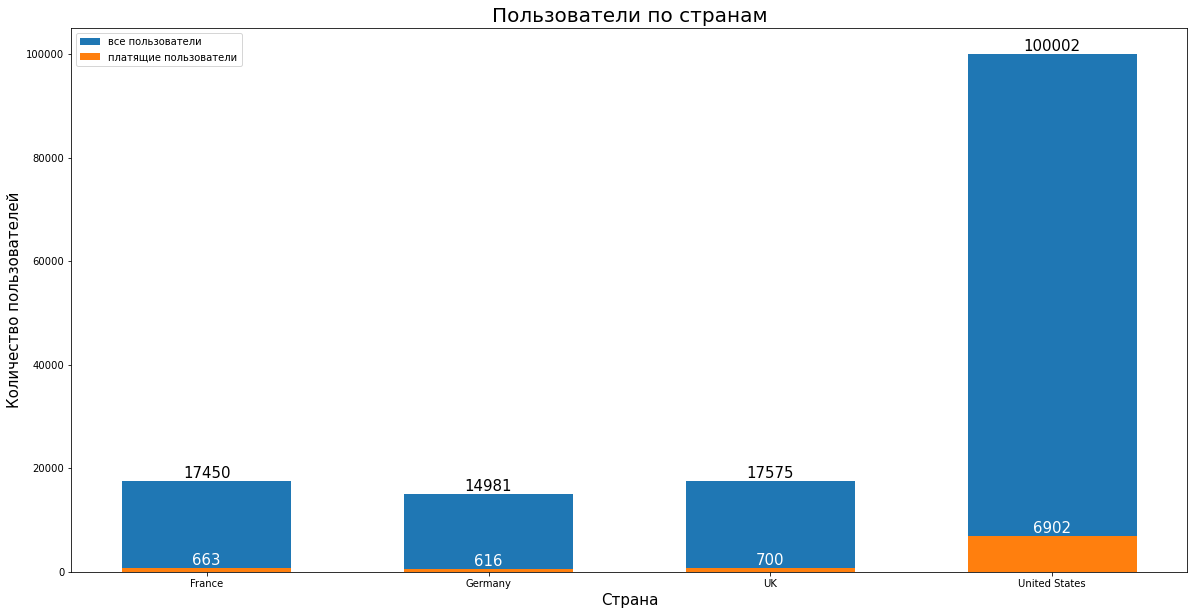

In [19]:
users_group(users,'region','Пользователи по странам', 'Страна')

,device,all_users,payers,payers_share_percents
3,iPhone,54479,3382,6.21
0,Android,35032,2050,5.85
1,Mac,30042,1912,6.36
2,PC,30455,1537,5.05


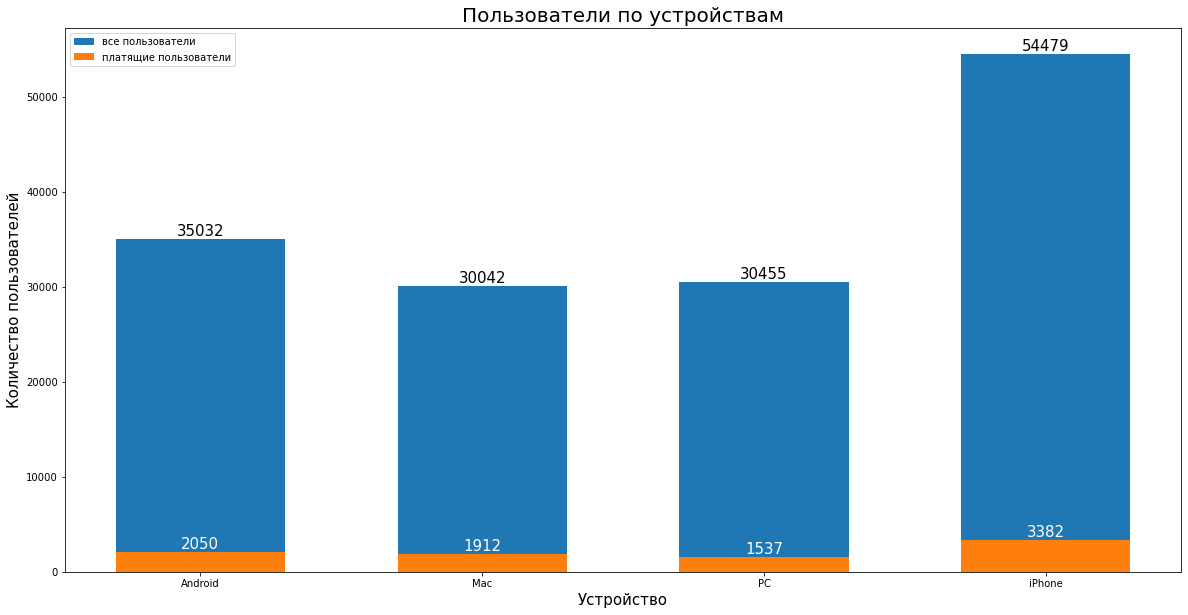

In [20]:
users_group(users,'device','Пользователи по устройствам', 'Устройство')

,channel,all_users,payers,payers_share_percents
1,FaceBoom,29144,3557,12.20
6,TipTop,19561,1878,9.60
10,organic,56439,1160,2.06
7,WahooNetBanner,8553,453,5.30
0,AdNonSense,3880,440,11.34
5,RocketSuperAds,4448,352,7.91
2,LeapBob,8553,262,3.06
4,OppleCreativeMedia,8605,233,2.71
9,lambdaMediaAds,2149,225,10.47
8,YRabbit,4312,165,3.83


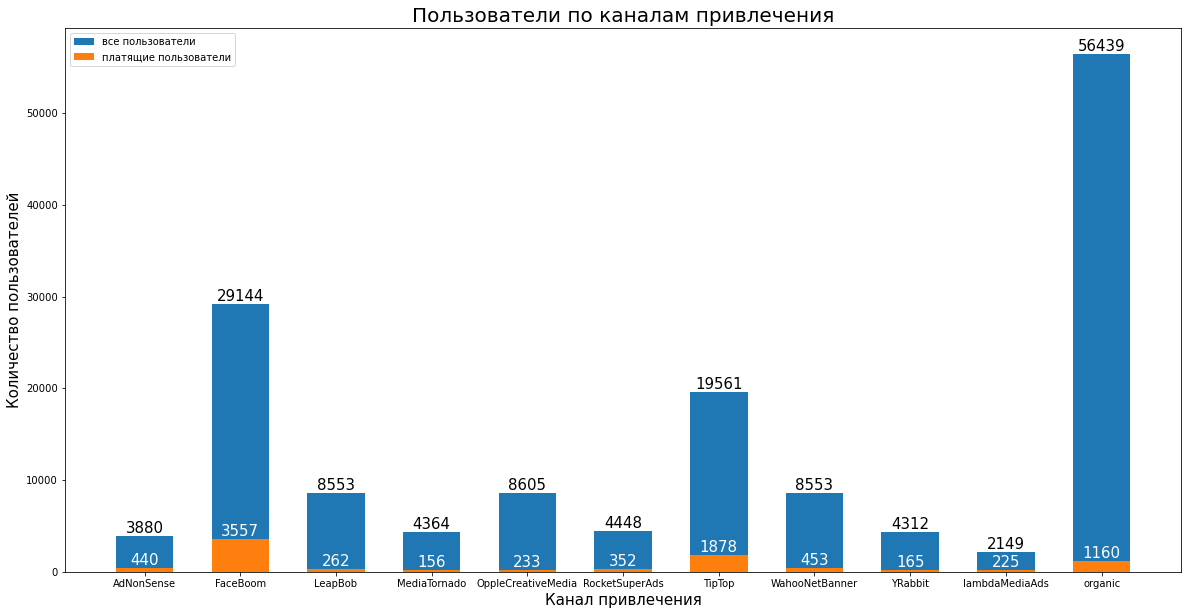

In [21]:
users_group(users,'channel','Пользователи по каналам привлечения', 'Канал привлечения')

#### Вывод

* Больше всего пользователей приходит из США. 
* Доля платящих пользователей выше всего тоже в США.
* Большинство пользователей использует мобильные устройства, лидирующее из которых - iPhone (как в целом среди всех пользователей, так и среди платящих пользователей).
* Из пользователей, привлеченных с помощью рекламы (в том числе платящих), больше всего приходит с FaceBoom. На втором месте - TipTop. (При этом, по количеству лидируют органические пользователи).

### 4. Маркетинг

#### 4.1. Анализ расходов на рекламу.

Посчитаем общую сумму расходов на маркетинг.

In [22]:
print('Общая сумма расходов на маркетинг:',costs['costs'].sum().round(2))

Общая сумма расходов на маркетинг: 105497.3


Посмотрим на распределение расходов по источникам привечения:

In [23]:
costs_grouped = costs.groupby('channel').agg('sum').reset_index().sort_values(by = 'costs', ascending = False)
costs_grouped 

,channel,costs
6,TipTop,54751.30
1,FaceBoom,32445.60
7,WahooNetBanner,5151.00
0,AdNonSense,3911.25
4,OppleCreativeMedia,2151.25
5,RocketSuperAds,1833.00
2,LeapBob,1797.60
9,lambdaMediaAds,1557.60
3,MediaTornado,954.48
8,YRabbit,944.22


Напишем функцию, которая построит столбчатую диаграмму для заданного датафрейма df, где col1 - колонка-измерение и col2 - количественная переменная.

In [24]:
def barplot(df,col1,col2,title,xlabel,ylabel):
    plt.figure(1, figsize=(20,10))
    ax = sns.barplot(data=df, x=col1, y=col2, color='blue')
    plt.xlabel(xlabel, fontsize = 15)
    plt.ylabel(ylabel, fontsize = 15)
    plt.title(title, fontsize = 20)
    plt.xticks(rotation = 15)
    
    # формируем надписи из нужной колонки датафрейма 
    rects = ax.patches
    labels = [round(i) for i in df[col2]]
    # выводим надписи на экран
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height+0.01, label,
                ha='center', va='bottom', fontsize = 15)

Вызовем функцию barplot, чтобы посмотреть распределение расходов по источникам привлечения.

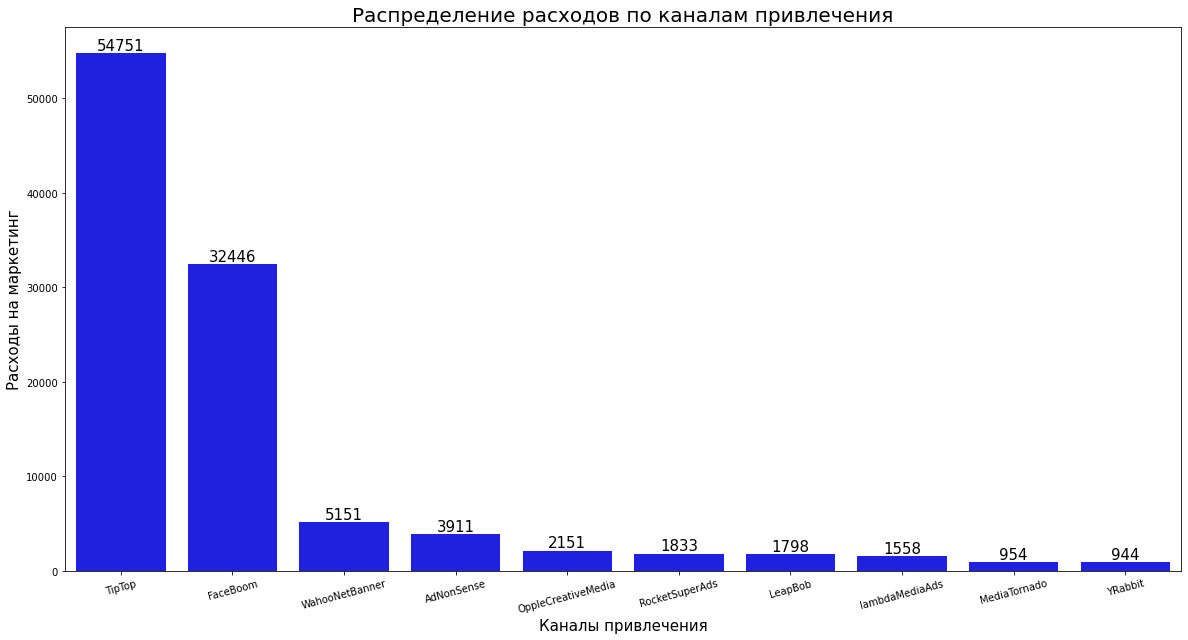

In [25]:
barplot(costs_grouped, 'channel', 'costs', 'Распределение расходов по каналам привлечения',\
                                            'Каналы привлечения', 'Расходы на маркетинг')

Больше всего затрат приходится на TipTop, на втором месте - FaceBoom.

Создадим датафреймы для визуализации изменения расходов во времени:
* costs_day - по дням;
* costs_month - по месяцам.

In [26]:
costs_per_month = costs.copy(deep=True)
costs_per_month['month'] = costs_per_month['dt'].dt.month
costs_per_month['week'] = costs_per_month['dt'].dt.isocalendar().week

costs_day = pd.pivot_table(
    data=costs_per_month,
    index='dt',
    values= 'costs',
    aggfunc='sum').reset_index()

costs_month = pd.pivot_table(
    data=costs_per_month,
    index='month',
    values= 'costs',
    aggfunc='sum').reset_index()

Создадим функцию lineplot для визуализации зависимости двух величин.

In [27]:
def lineplot(df,col1,col2,col3,title,xlabel,ylabel,xrotation):
    # df - датафрейм
    # col1, col2 - колонки датафрейма, зависимость значений которых будем визуализировать
    # col3 - измерение датафрейма, в разрезе которого смотрим зависимость 
    #        (если col3 = None - смотрим зависимость для всего датафрейма, без измерений)
    # title - наименование графика
    # xlabel, ylabel - наименования осей графика
    # xrotation - признак, есть ли поворот у меток оси Х (если названия меток длинные, используется поворот, чтобы
    #                                                     они поместились на графике)
    plt.figure(1, figsize=(16,8))
    plt.grid()
    
    ax = sns.lineplot(data = df, x = col1, y = col2, hue = col3)
    ax.set_title(title,fontsize=20)
    ax.set_xlabel(xlabel,fontsize=15)
    ax.set_ylabel(ylabel,fontsize=15)
    if xrotation:
        plt.xticks(rotation=45)

Построим график изменения общих расходов на рекламу по дням.

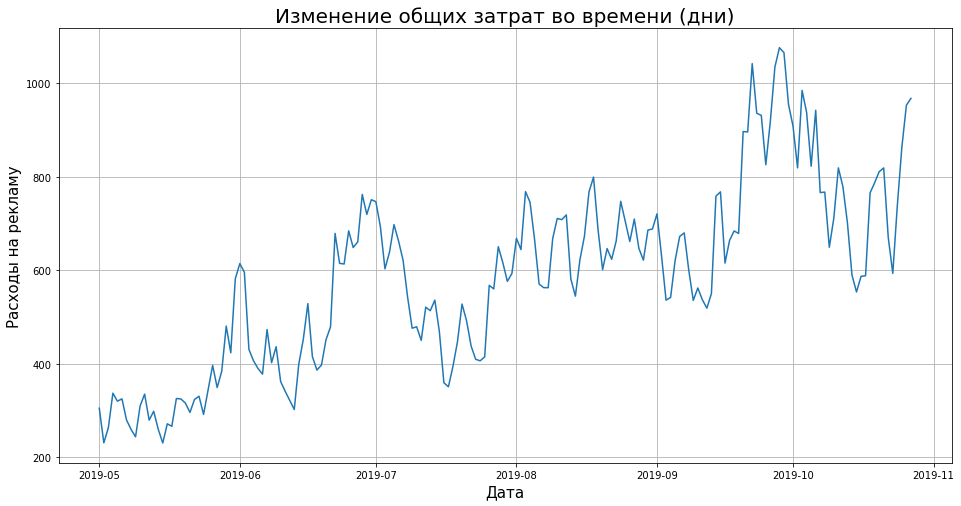

In [28]:
lineplot(costs_day, 'dt', 'costs', None, 'Изменение общих затрат во времени (дни)', 'Дата', 'Расходы на рекламу',False)

На графике заметна тенденция увеличения расходов на рекламу в целом.

Теперь построим график изменения расходов по месяцам.

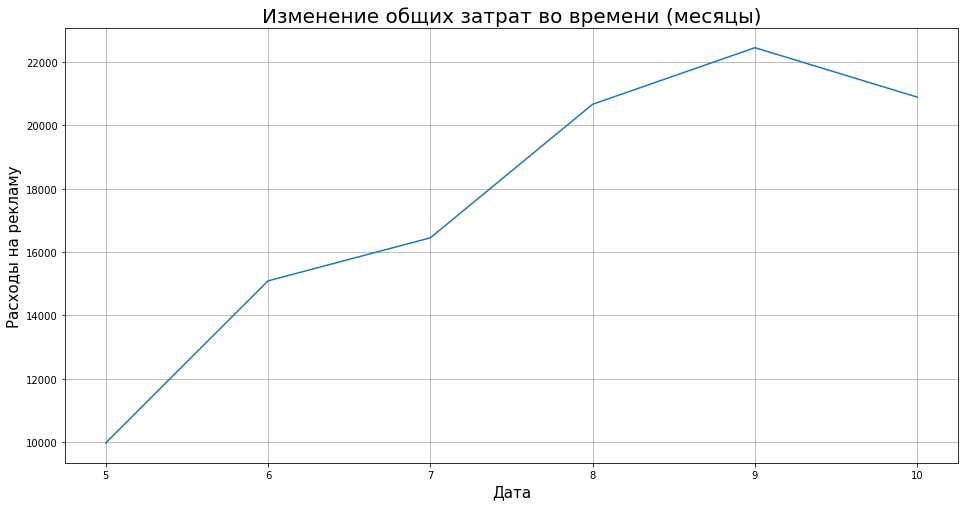

In [29]:
lineplot(costs_month, 'month', 'costs', None, 'Изменение общих затрат во времени (месяцы)', 'Дата', 'Расходы на рекламу',False)

С мая по сентябрь расходы на рекламу постоянно растут, лишь в октябре наблюдается небольшое снижение расходов.

Теперь посмотрим на динамику расходов по месяцам, неделям и дням в разрезе каналов привлечения.

In [30]:
costs_per_month_channel = costs_per_month \
                        .groupby(['month', 'channel']) \
                        .agg({'costs': 'sum'}) \
                        .reset_index()

costs_per_week_channel = costs_per_month \
                        .groupby(['week', 'channel']) \
                        .agg({'costs': 'sum'}) \
                        .reset_index()

costs_per_day_channel = costs_per_month \
                        .groupby(['dt', 'channel']) \
                        .agg({'costs': 'sum'}) \
                        .reset_index()

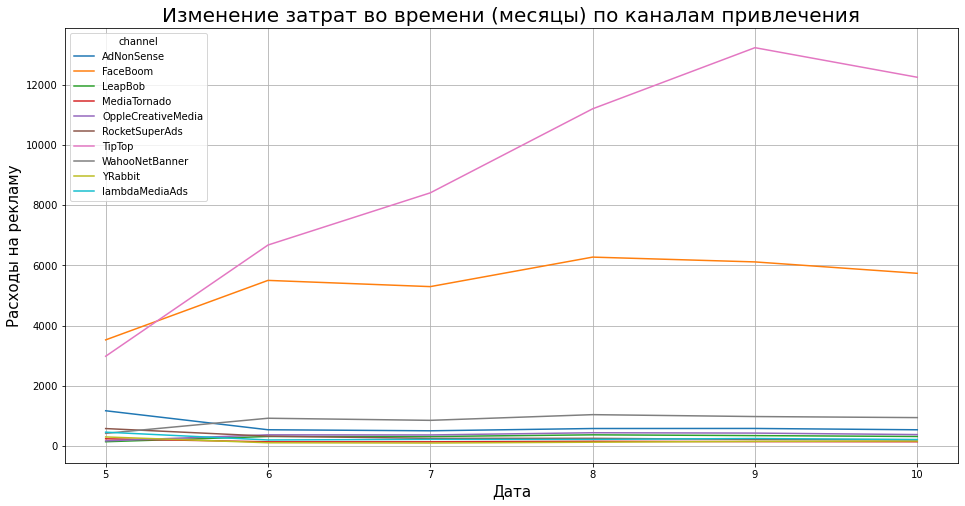

In [31]:
lineplot(costs_per_month_channel, 'month', 'costs', 'channel', \
         'Изменение затрат во времени (месяцы) по каналам привлечения', 'Дата', 'Расходы на рекламу',False)

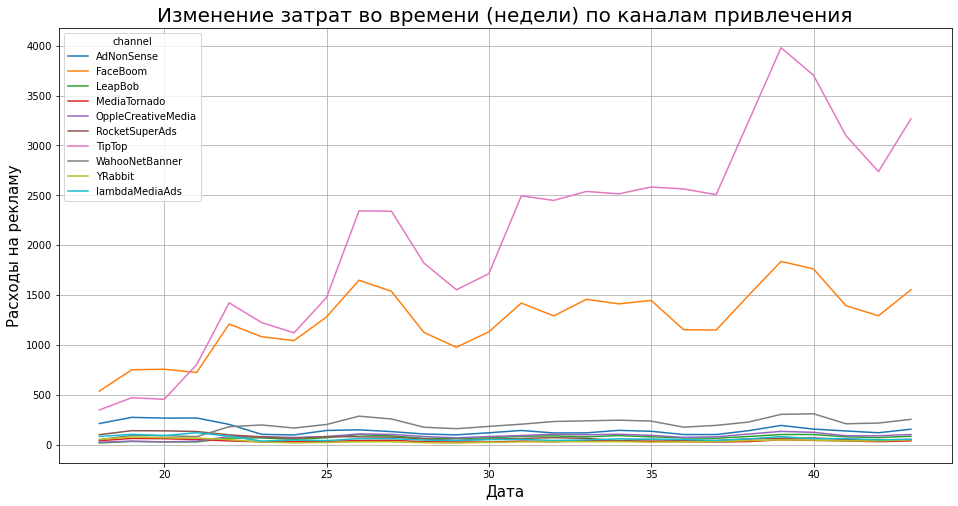

In [32]:
lineplot(costs_per_week_channel, 'week', 'costs', 'channel', \
         'Изменение затрат во времени (недели) по каналам привлечения', 'Дата', 'Расходы на рекламу',False)

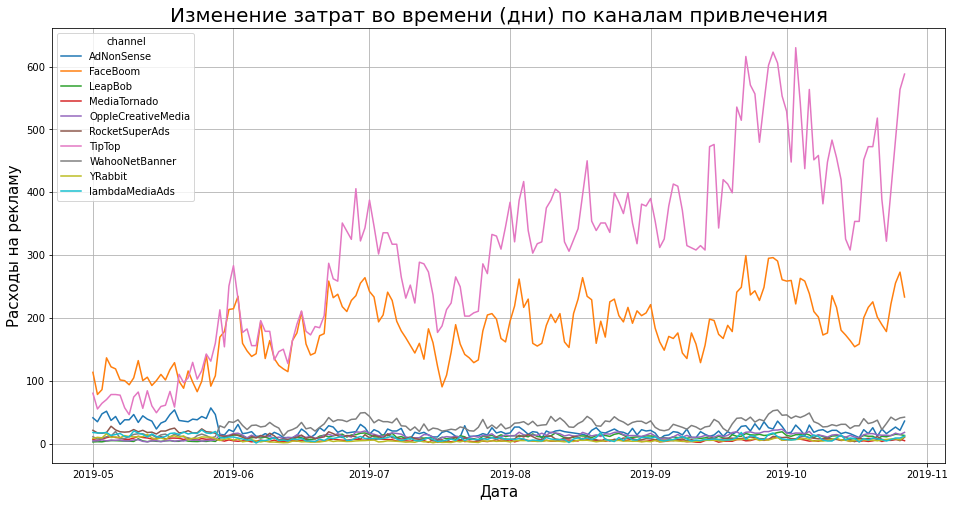

In [33]:
lineplot(costs_per_day_channel, 'dt', 'costs', 'channel', \
         'Изменение затрат во времени (дни) по каналам привлечения', 'Дата', 'Расходы на рекламу', False)

##### Вывод
* Больше всего расходов идет на канал TipTop, затем на FaceBoom. Причем, если смотреть по месяцам, расходы на эти каналы постоянно растут, тогда как вложения в остальные источники остаются практически на одном уровне.
* Рост и падение расходов на  TipTop и FaceBoom происходит синхронно (это хорошо заметно на графиках по неделям и дням), скорее всего реклама этих каналов запускается одновременно.

#### 4.2. Расчет среднего CAC на одного пользователя.

Посчитаем, сколько в среднем стоило привлечение одного пользователя для всего проекта.

In [34]:
print('Средний CAC по проекту: ',users.query('channel != "organic"')['acquisition_cost'].mean())

Средний CAC по проекту:  1.127481323942928


Посчитаем стоимость привлечения одного пользователя для каждого источника.

In [35]:
users_acquisition_channel = users.pivot_table(
    index='channel', 
    values='acquisition_cost', 
    aggfunc='mean'
).sort_values(
    by='acquisition_cost',
    ascending=False
).reset_index()
users_acquisition_channel

,channel,acquisition_cost
0,TipTop,2.799003
1,FaceBoom,1.113286
2,AdNonSense,1.008054
3,lambdaMediaAds,0.724802
4,WahooNetBanner,0.602245
5,RocketSuperAds,0.412095
6,OppleCreativeMedia,0.250000
7,YRabbit,0.218975
8,MediaTornado,0.218717
9,LeapBob,0.210172


Визуализируем распределение CAC по источникам привлечения.

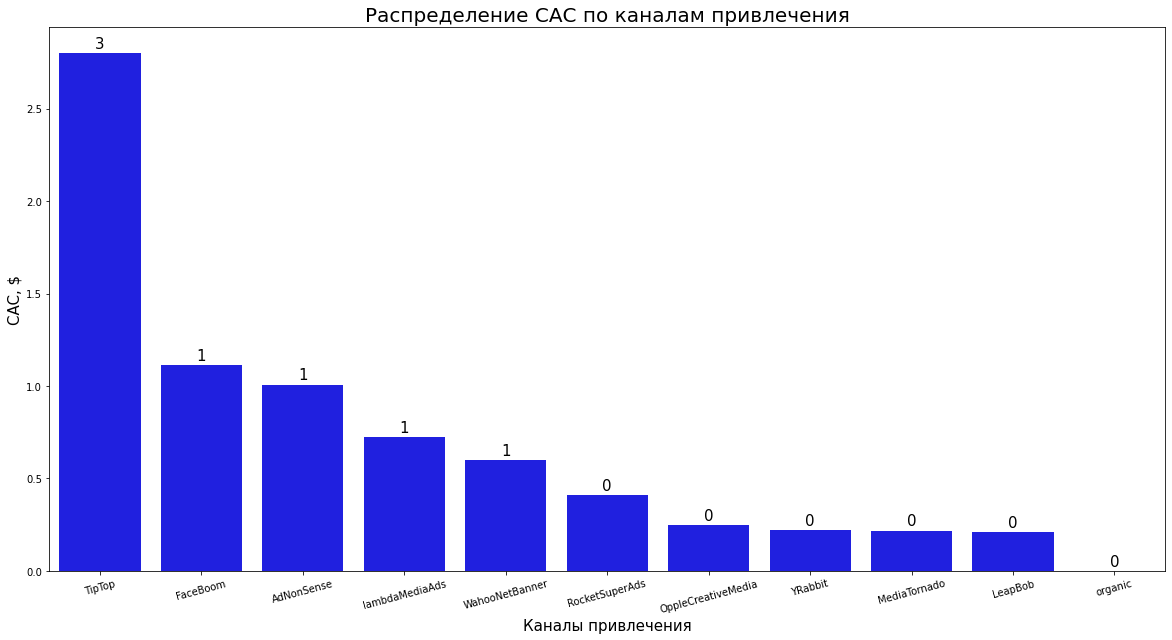

In [36]:
barplot(users_acquisition_channel,'channel','acquisition_cost',\
         'Распределение САС по каналам привлечения', 'Каналы привлечения', 'CAC, $')

##### Вывод

Больше всего рекламных средств ушло на канал TipTop. При этом количество пользователей, пришедших с этого канала, в том числе платящих, не самое большое. То есть, вложения в рекламу TipTop не оправдываются.

### 5. Оценка окупаемости рекламы.

#### 5.1. Создание функций для расчета и вывода графиков бизнес-показателей

##### LTV, ROI

Создадим функцию для расчета LTV и ROI.

In [37]:
def get_ltv_roi(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
     # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )    
    # рассчитаем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']
        
    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
         # посчитаем сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        
        # вычислим размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединим размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        #  Посчитаем LTV
        # делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        
        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )
        
        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)
        
        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        
        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes
        
        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']
        
        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        
        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )
    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []
    
    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

Напишем функцию для вывода графиков LTV и ROI, ф также графиков динамики LTV, CAC и ROI.

In [38]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

##### Retention Rate

Напишем функцию для расчета Retention Rate.

In [39]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Напишем функцию для вывода графиков Retention Rate.

In [40]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

##### Conversion Rate

Создадим функцию для расчета Conversion Rate.

In [41]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Напишем функцию для вывода графиков по Conversion Rate.

In [42]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

Напишем функцию для сглаживания фрейма.

In [43]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

#### 5.2. Анализ общей окупаемости.

Зададим момент и горизонт анализа данных.

In [44]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

Органических пользователей исключим из анализа окупаемости рекламы, так как не несем расходы на их привлечение.

Построим графики LTV и ROI, а также динамики LTV, CAC и ROI для рекламных расходов по всему проекту в целом.

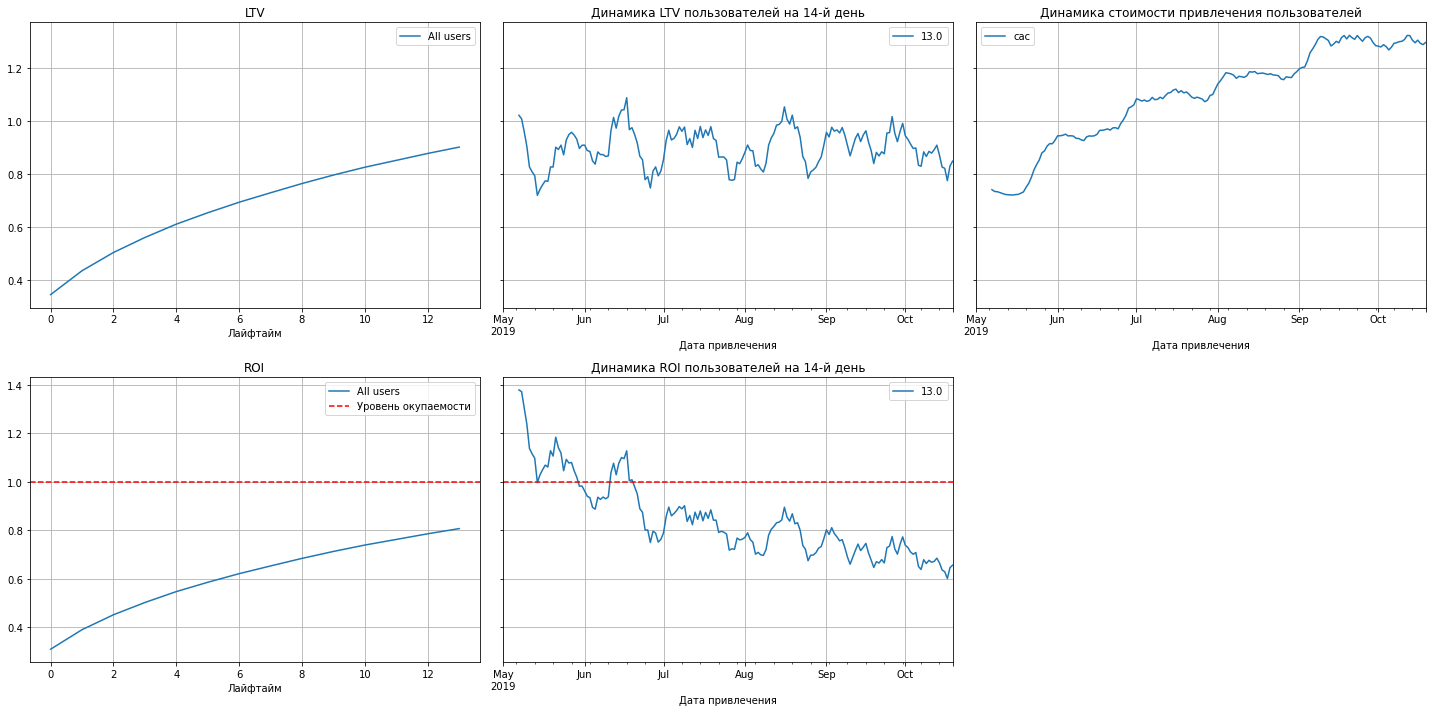

In [45]:
profiles_without_organic = users.query('channel != "organic"')

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv_roi(
    profiles_without_organic, orders, observation_date, horizon_days
)
    
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Из анализа графиков можно сделать следующие выводы:
* Прибыль с пользователей нестабильна, т.к. на графике динамики LTV есть периодически рост и падение;
* Есть тенденция роста стоимости привлечения одного пользователя (CAC);
* График ROI показывает, что реклама не окупается. На графике динамики ROI видно снижение окупаемости инвестиций по проекту в целом.

#### 5.3. Анализ окупаемости с разбивкой по рекламным каналам.

Построим графики LTV и ROI, а также динамики LTV, CAC и ROI для рекламных расходов в разрезе каналов привлечения.

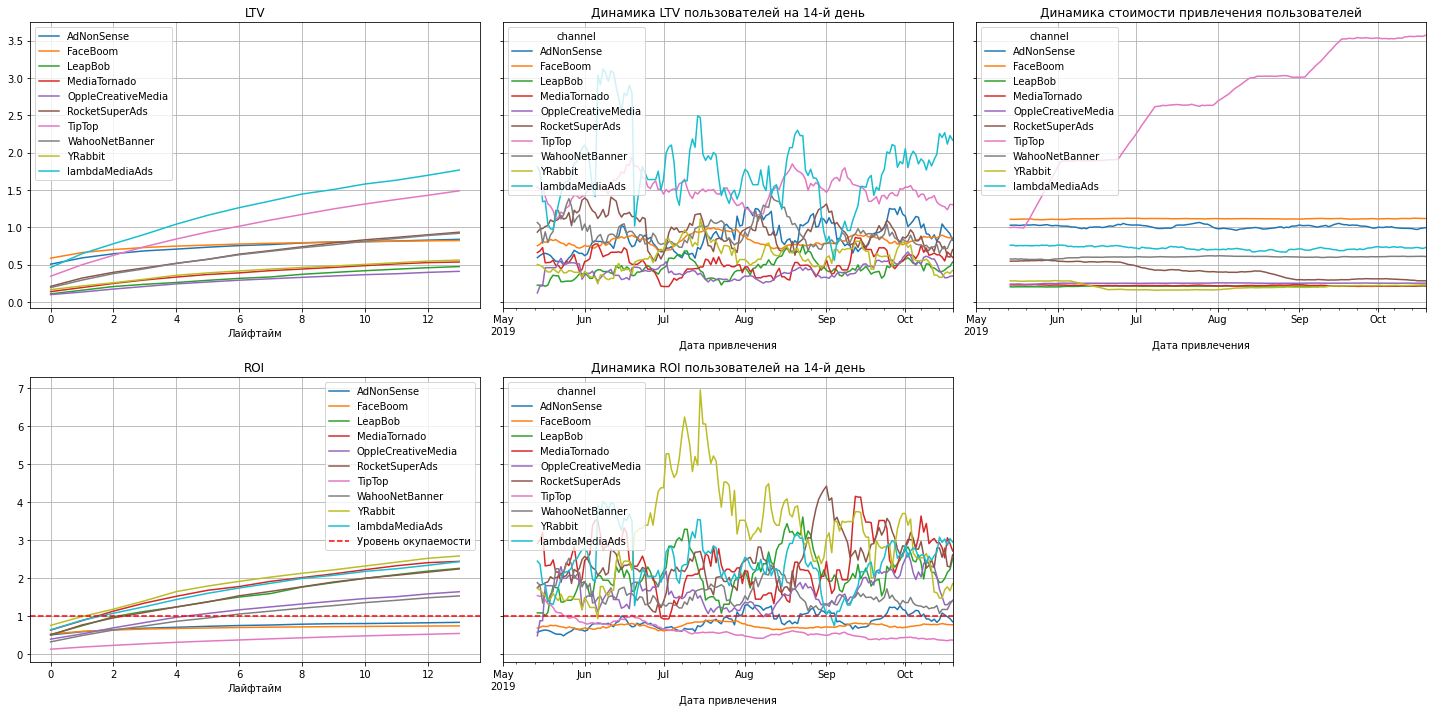

In [46]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv_roi(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=['channel'])

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

Из анализа графиков можно сделать следующие выводы:
* Стоимость привлечения пользователя (CAC) для канала TipTop все время увеличивается, затраты на другие источники привлечения являются практически постоянными;
* График ROI показывает, что реклама каналов TipTop, FaceBoom и AdNonSense не окупается. 

#### 5.4. Анализ окупаемости с разбивкой странам.

Построим графики LTV и ROI, а также динамики LTV, CAC и ROI для рекламных расходов в разрезе стран.

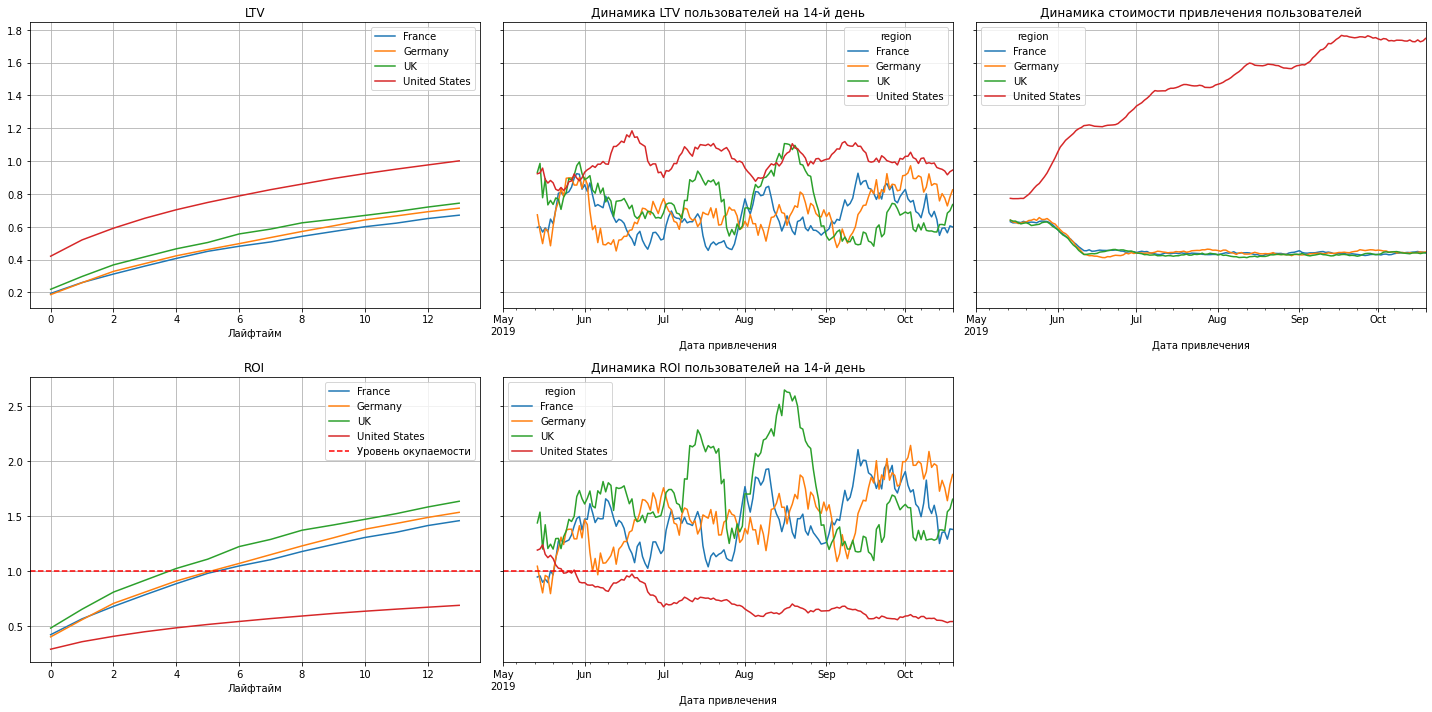

In [47]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv_roi(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=['region'])

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

Графики показывают, что:
* В США стоимость привлечения одного пользователя (CAC) постоянно растет, а в других регионах она практически равномерна;
* График ROI показывает, что в США реклама не окупается. 
* На графике динамики ROI видно снижение окупаемости инвестиций в США, тогда как в других странах реклама окупается.

#### 5.5. Анализ окупаемости с разбивкой по устройствам.

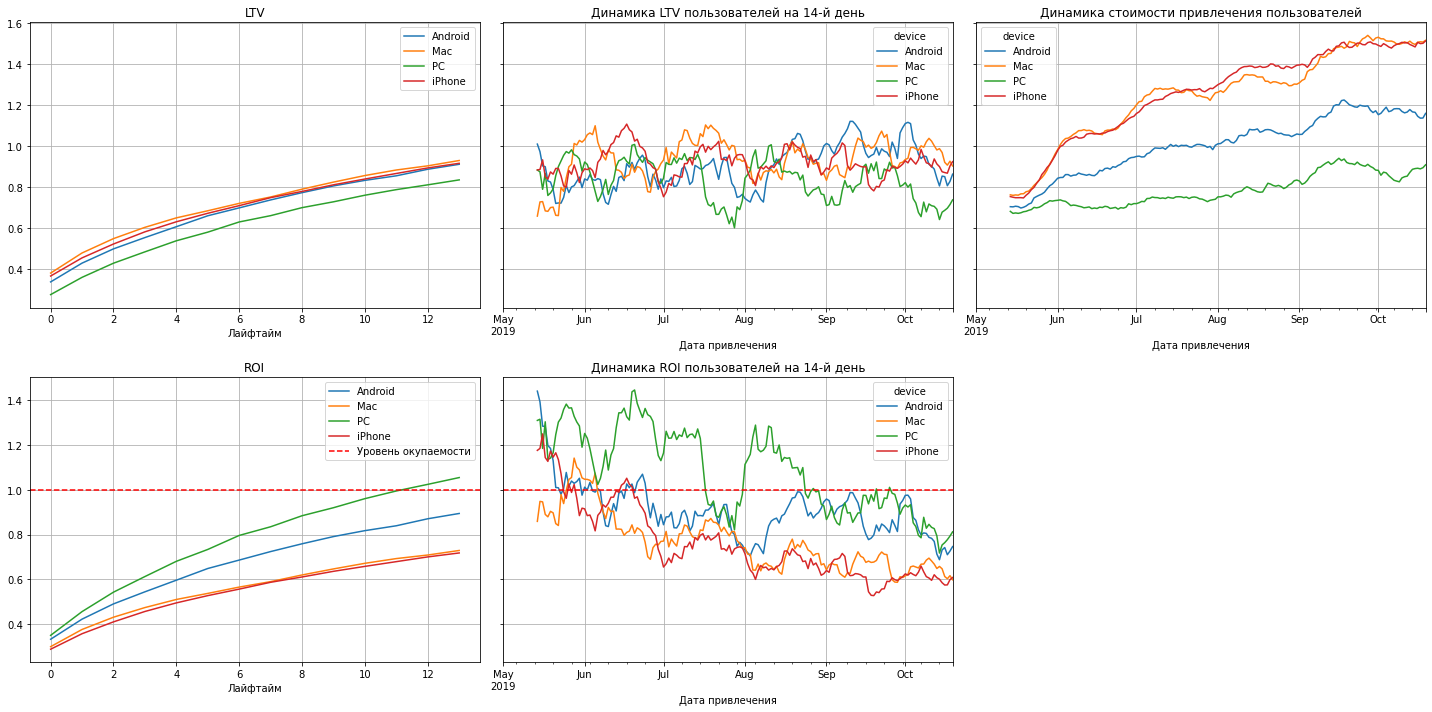

In [48]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv_roi(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=['device'])

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

По графикам видно, что:
* По сравнению с другими устройствами CAC у PC увеличивается незначительно.
* PC - единственное устройство, которое окупается (на 11 день после запуска рекламы).

#### 5.6. Анализ конверсии и удержания.

#### По устройствам

<b>Конверсия</b>

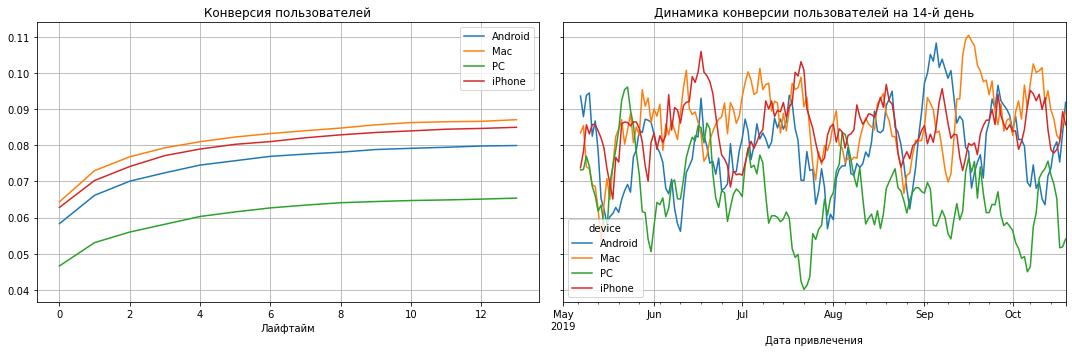

In [49]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

<b>Удержание</b>

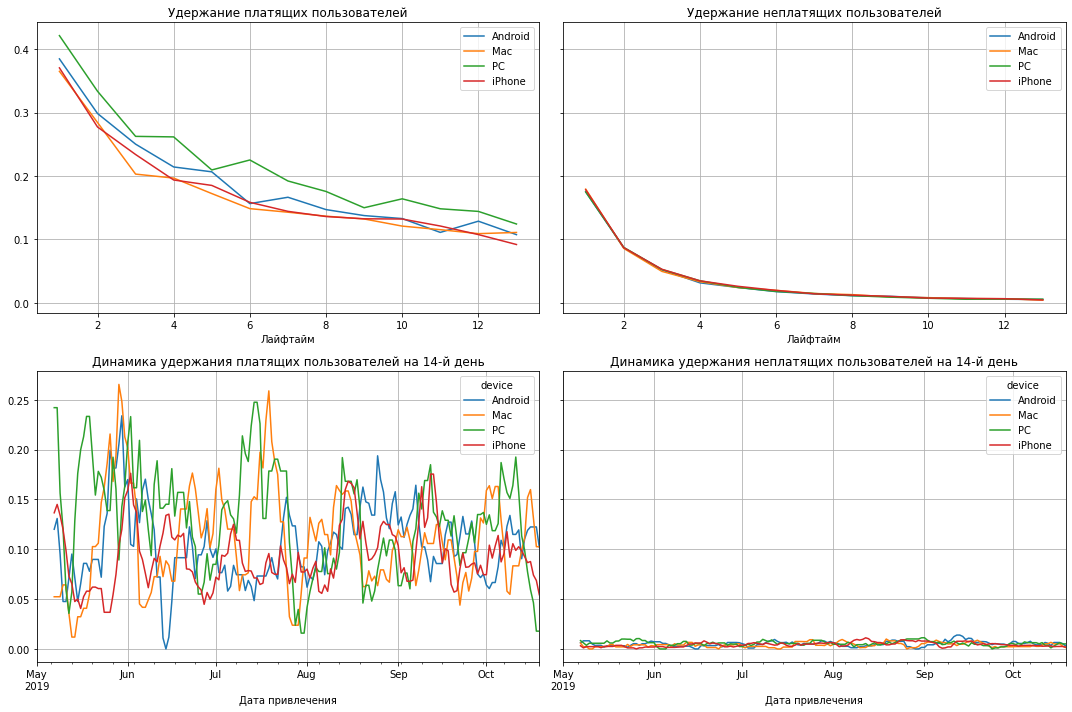

In [50]:
retention_raw, retention_grouped, retention_history = get_retention(
   profiles_without_organic, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days)

Конверсия выше у Mac и iPhone, а удержание у PC.

#### По странам

<b>Конверсия</b>

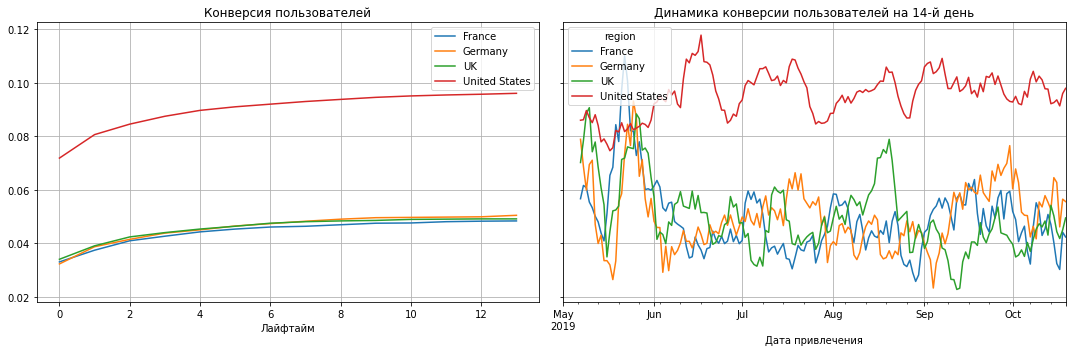

In [51]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

<b>Удержание</b>

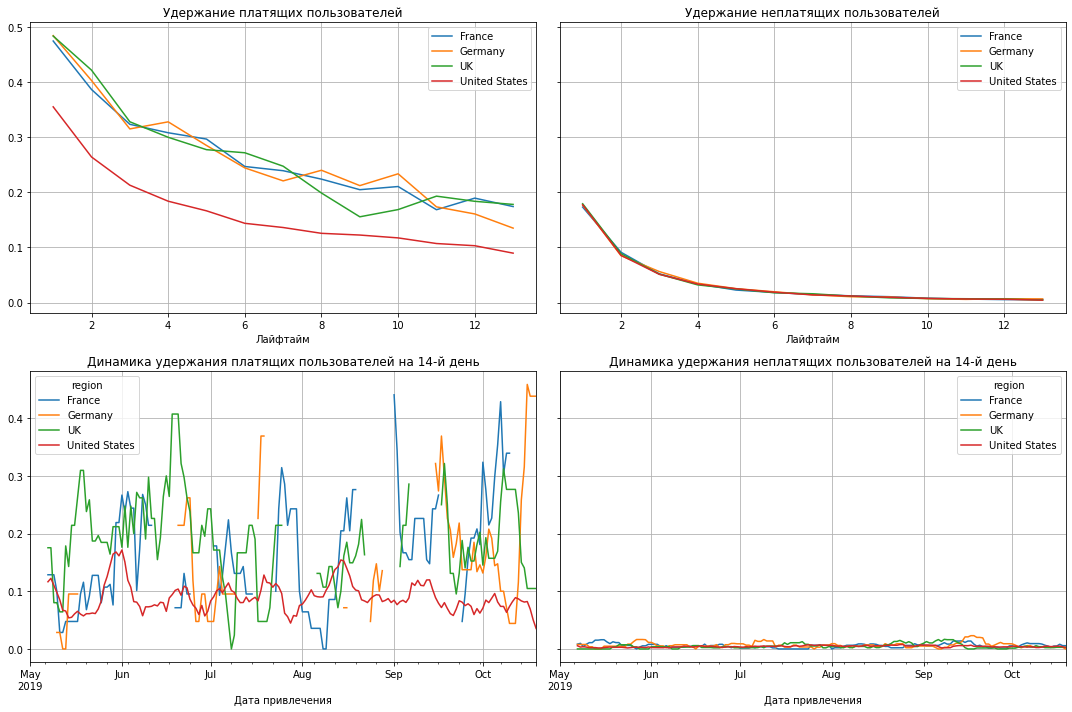

In [52]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_without_organic, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

У пользователей США самая высокая конверсия, но при этом самое низкое удержание.

#### По рекламным каналам

<b>Конверсия</b>

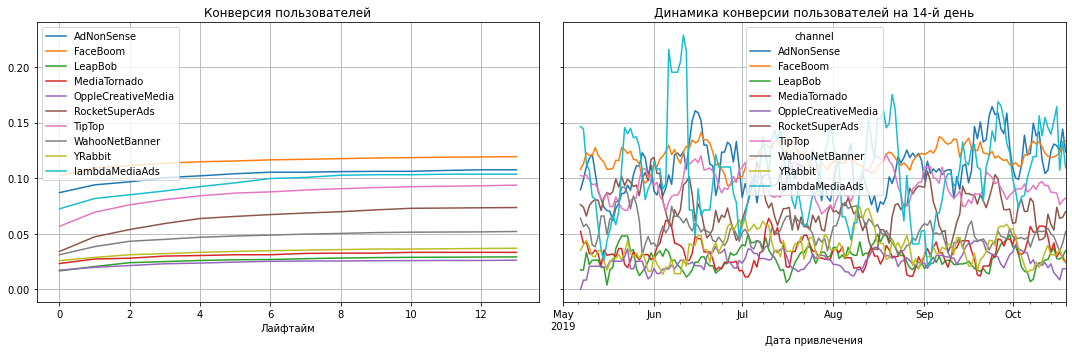

In [53]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

<b>Удержание</b>

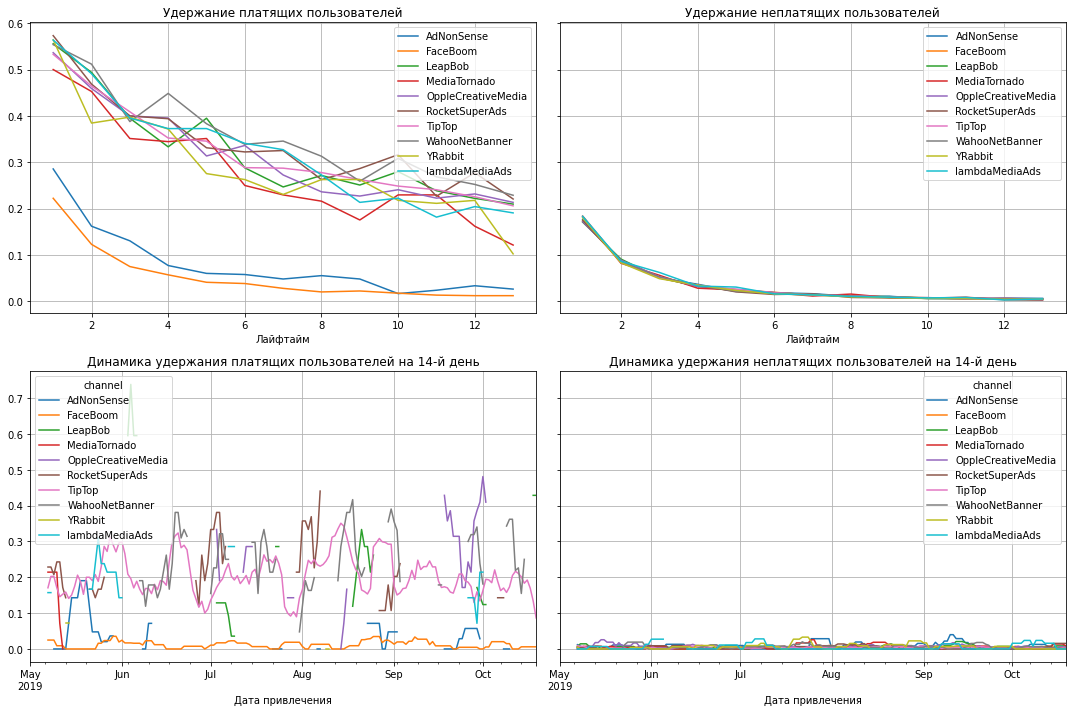

In [54]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_without_organic, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Несмотря на высокую конверсию у каналов FaceBoom и AdNonSense удержание гораздо ниже, чем у остальных источников привлечения.

#### Вывод

* Реклама в целом не окупается за 14 дней.
* Выявлены следующие проблемы:
    * Самый проблемный регион - США. Стоимость привлечения пользователей в этом регионе постоянно растет, а окупаемость снижается.
    * Проблемными каналами являются TipTop, FaceBoom и AdNonSense.
    * При анализе устройств проблем не обнаружено.
* Чем могут быть вызваны проблемы окупаемости?
    * На рекламу канала TipTop идет большое количество средств, но расходы не окупаются.
    * У каналов FaceBoom и AdNonSense высокая конверсия, но низкое удержание, что сказывается на окупаемости.
    * В США при высокой конверсии низкое удержание пользователей, поэтому расходы на рекламу не окупаются.

## Общий вывод:

##### Вопрос 1: Выделите причины неэффективности привлечения пользователей.

* Большие вложения рекламных средств производятся в популярные каналы TipTop и FaceBoom, которые не приносят прибыли. 
* Низкое удержание пользователей в США может являться причиной того, затраты на рекламу не окупаются, так как наибольшее число пользователей приложения - из США.

##### Вопрос 2: Сформулируйте рекомендации для отдела маркетинга.

* Пересмотреть распределение рекламных средств по каналам (возможно имеет смысл уменьшить расходы на TipTop и FaceBoom, которые не приносят прибыли, и обратить внимание на другие каналы, которые окупаются).
* Возможно имеет смысл развивать рекламу на PC-устройствах, так как пользователи, приходящие с этих устройств, удерживаются лучше всего;
* Обратить внимание на США, где расходы на рекламу не окупаются: возможно пересмотреть целевую аудиторию или стоимость покупки.